# Import library

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. importing color images and display results using functions from cv2

In [44]:
fp = "../../images/lena_color_256.tif"
img = cv2.imread(fp)
print(img.shape)
print(img.dtype)
print(type(img))

(256, 256, 3)
uint8
<class 'numpy.ndarray'>


In [45]:
cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2. Importing color images and display results using functions from matplotlib.pyplot

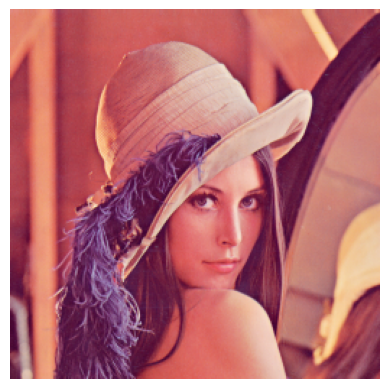

In [46]:
plt.axis("off")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.savefig('./outs/output.png')

In [47]:
# 3. Saving image files

In [48]:
cv2.imwrite('./outs/lena_color_256.png', img.astype(np.uint8))

True

In [49]:
del(img)
del(fp)

# 4. Converting Color to grayscale image

#### <span style='color:yellow;'>Method I</span>   

<class 'numpy.ndarray'>
(139, 162)


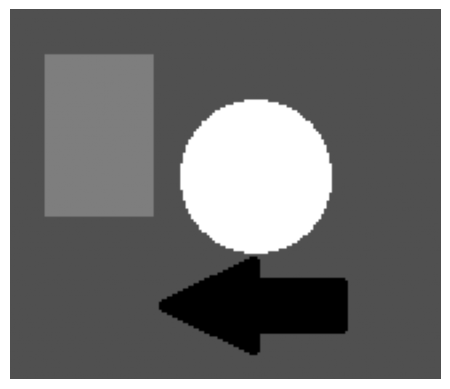

In [50]:
fp = "../../images/test_color.png"
img = cv2.imread( "../../images/test_color.png", 0)
print(type(img))
print(img.shape)
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

In [51]:
del(img)
del(fp)

#### <span style='color:yellow;'>Method II</span>   

<class 'numpy.ndarray'>
(139, 162, 3)


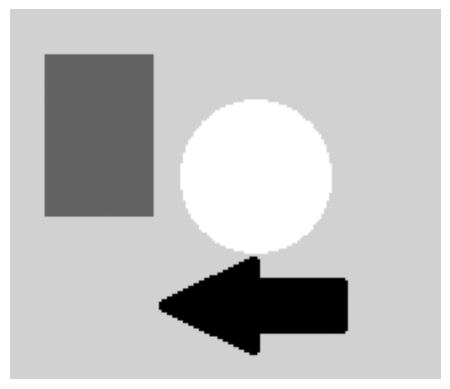

In [52]:
fp = "../../images/test_color.png"
img = cv2.imread(fp) # BGR FORMAT
print(type(img))
print(img.shape)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.show()

In [53]:
del img
del fp

#### <span style='color:yellow;'>Method III</span>   

In [54]:
fp = "../../images/mandril_color.tif"
img = cv2.imread(fp)

In [55]:
r = img[:,:,2].astype(np.float32)
g = img[:,:,1].astype(np.float32)
b = img[:,:,0].astype(np.float32)
#b, g, r = cv2.split(img)
print(b.shape, g.shape, r.shape)
print(type(b), type(g), type(r))
m, n = r.shape
print(m, n)

(512, 512) (512, 512) (512, 512)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
512 512


In [56]:
print(r)

[[166.  56.  65. ... 106. 141. 171.]
 [106. 139.  38. ... 114. 130. 117.]
 [ 75. 123.  50. ...  98.  82.  97.]
 ...
 [116. 115. 117. ...  87.  92.  74.]
 [115. 116. 115. ...  64.  74.  64.]
 [115. 116. 115. ...  64.  74.  64.]]


In [57]:
gray = np.zeros_like(r, dtype='float')

for i in range(m):
    for j in range(n):
        gray[i, j] = 0.2989*r[i,j] + 0.5870*g[i,j] + 0.1140*b[i,j]

In [58]:
gray

array([[138.27839661,  48.90439987,  47.04650497, ..., 104.88840485,
        145.00289917, 174.93690491],
       [104.88840485, 105.14910126,  28.18220139, ..., 120.90660095,
        143.86401367, 114.25730896],
       [ 63.63350296, 105.04570007,  42.22100449, ...,  87.91419983,
         80.64080811,  76.99130249],
       ...,
       [134.03240967, 135.95549011, 132.1993103 , ...,  70.33229828,
         82.13080597,  72.64160156],
       [141.80351257, 133.10339355, 126.20450592, ...,  71.26560211,
         72.8526001 ,  59.88460159],
       [141.80351257, 133.10339355, 126.20450592, ...,  71.26560211,
         72.8526001 ,  59.88460159]], shape=(512, 512))

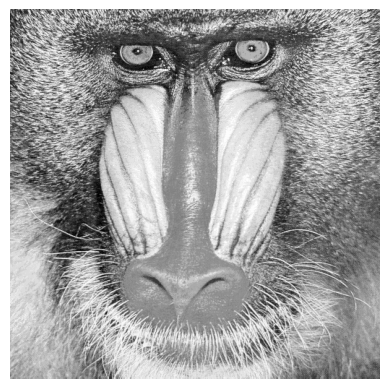

True

In [59]:
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.show()
cv2.imwrite('./outs/mandril_gray.png', gray.astype(np.uint8))

**<span style='color:orange;'> Matrix Operation</span>**

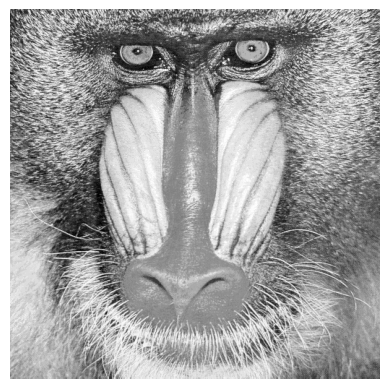

True

In [60]:
fp = "../../images/mandril_color.tif"
img = cv2.imread(fp)
b = 0.1140*img[:,:,0].astype(np.float16)
g = 0.5870*img[:,:,1].astype(np.float16)
r = 0.2989*img[:,:,2].astype(np.float16)

gray = b + g + r
gray = gray.astype(np.uint8)
plt.axis("off")
plt.imshow(gray, cmap='gray')
plt.show()
cv2.imwrite("./outs/mandril_gray.png", gray)

In [61]:
del(img)
del(fp)

## <span style='color:lightgreen;'>What is the digital image histogram?</span> 

#### <span style='color:yellow;'>Method I: Create Histogram array using cv2.calcHist </span>      

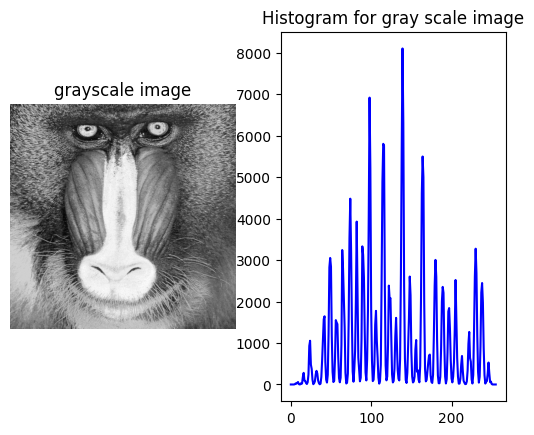

In [62]:
fp = "../../images/mandril_color.tif" # file path to the image
img = cv2.imread(fp) # BGR FORMAT
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
i = 2 # channel to be used for histogram
hist= cv2.calcHist([img], [i], None, [256], [0,256]) # Calculate histogram for channel i

fig = plt.figure() 
fig.add_subplot(1, 2, 1)
plt.imshow(img[:, :, i], cmap='gray')
plt.axis('off')
plt.title("grayscale image")

fig.add_subplot(1, 2, 2)
plt.plot(hist, color='b')
plt.title("Histogram for gray scale image")
plt.show()

In [63]:
print(hist)

[[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [7.000e+00]
 [2.500e+01]
 [1.900e+01]
 [4.000e+01]
 [5.900e+01]
 [9.000e+00]
 [1.000e+00]
 [5.000e+00]
 [3.500e+01]
 [2.200e+01]
 [1.790e+02]
 [2.800e+02]
 [9.300e+01]
 [8.300e+01]
 [3.400e+01]
 [1.200e+01]
 [5.400e+01]
 [2.430e+02]
 [9.300e+02]
 [1.054e+03]
 [4.790e+02]
 [3.740e+02]
 [1.120e+02]
 [7.000e+00]
 [3.000e+01]
 [7.800e+01]
 [2.420e+02]
 [3.290e+02]
 [2.650e+02]
 [9.600e+01]
 [3.200e+01]
 [5.000e+00]
 [1.800e+01]
 [1.810e+02]
 [5.930e+02]
 [1.095e+03]
 [1.575e+03]
 [1.644e+03]
 [5.390e+02]
 [1.170e+02]
 [4.600e+01]
 [2.340e+02]
 [1.221e+03]
 [2.826e+03]
 [3.051e+03]
 [2.840e+03]
 [1.167e+03]
 [3.040e+02]
 [5.900e+01]
 [8.600e+01]
 [6.210e+02]
 [1.552e+03]
 [1.497e+03]
 [1.454e+03]
 [6.730e+02]
 [1.560e+02]
 [5.200e+01]
 [1.630e+02]
 [9.560e+02]
 [3.242e+03]
 [2.794e+03]
 [2.128e+03]
 [1.380e+03]
 [2.840e+02]
 [2.400e+01]
 [4.500e+01]
 [2.640e+02]
 [1.524e+03]
 [3.525e+03]
 [4.480e+03]
 [3.264e+03]
 [1.590e+03]

In [64]:
del(img)
del(fp)
del(hist)
del(gray)

### <span style="color:yellow">Method II: Show Histogram using plt.hist</span>

C:\Users\champ\AppData\Local\Temp\ipykernel_16744\2923007665.py:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256])


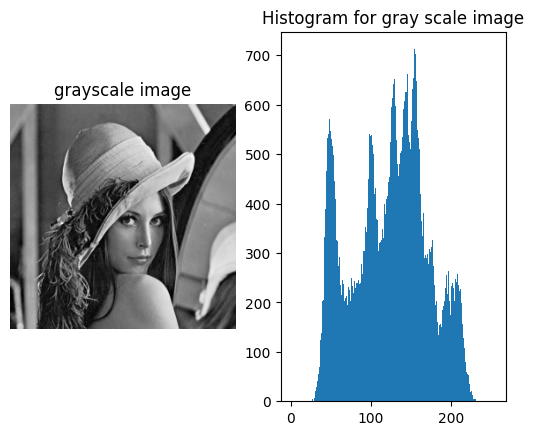

In [65]:
fp = "../../images/lena_color_256.tif"
img = cv2.imread(fp)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img[:, :, 1], cmap='gray')
plt.axis('off')
plt.title("grayscale image")

fig.add_subplot(1, 2, 2)
plt.hist(gray.ravel(), 256, [0, 256])
plt.title("Histogram for gray scale image")
plt.show()

In [66]:
del(img)
del(fp)
del(gray)

### <span style="color:yellow">Method III: Show Histogram using frequency array</span>

1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
2.0
1.0
3.0
4.0
5.0
2.0
3.0
2.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
3.0
1.0
2.0
3.0
4.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
3.0
4.0
2.0
3.0
2.0
3.0
1.0
1.0
2.0
2.0
4.0
2.0
2.0
3.0
4.0
5.0
6.0
3.0
4.0
5.0
3.0
5.0
3.0
6.0
7.0
4.0
7.0
1.0
5.0
6.0
6.0
7.0
8.0
2.0
8.0
9.0
4.0
5.0
5.0
6.0
7.0
4.0
7.0
8.0
8.0
10.0
9.0
5.0
11.0
9.0
8.0
9.0
3.0
12.0
10.0
6.0
10.0
1.0
11.0
6.0
2.0
12.0
7.0
13.0
8.0
3.0
13.0
4.0
9.0
9.0
10.0
11.0
7.0
12.0
13.0
14.0
5.0
6.0
2.0
15.0
3.0
2.0
2.0
2.0
3.0
1.0
2.0
3.0
1.0
3.0
2.0
4.0
1.0
1.0
2.0
2.0
6.0
1.0
2.0
4.0
7.0
1.0
1.0
1.0
3.0
1.0
4.0
3.0
2.0
2.0
8.0
3.0
4.0
2.0
5.0
6.0
3.0
4.0
5.0
6.0
5.0
9.0
4.0
3.0
7.0
4.0
3.0
5.0
7.0
10.0
2.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
3.0
2.0
4.0
5.0
2.0
1.0
2.0
3.0
3.0
3.0
4.0
1.0
5.0
3.0
4.0
5.0
6.0
2.0
3.0
7.0
3.0
4.0
5.0
1.0
4.0
4.0
2.0
3.0
3.0
5.0
7.0
4.0
5.0
5.0


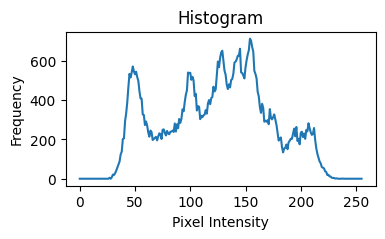

In [81]:
fp = "../../images/lena_color_256.tif"
img = cv2.imread(fp)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_img = np.zeros(256) # Initialize histogram array
row, col = gray.shape
for i in range(row):
    for j in range(col):
        intens = gray[i, j]
        hist_img[intens] += 1
        print(hist_img[intens])

plt.figure(figsize=(4, 2))
plt.plot(hist_img)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


### <span style='color:lightgreen;'>Histogram of Color Image </span> 

(512, 512, 3)


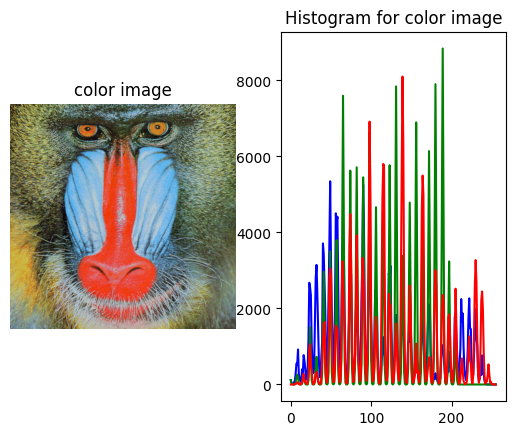

In [ ]:
fp = "../../images/mandril_color.tif"
img = cv2.imread(fp)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("color image")
r, c, n = img.shape
color_fig = ['b', 'g', 'r']
fig.add_subplot(1, 2, 2)
for  i in range(n):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = color_fig[i])
plt.title("Histogram for color image")
plt.show()

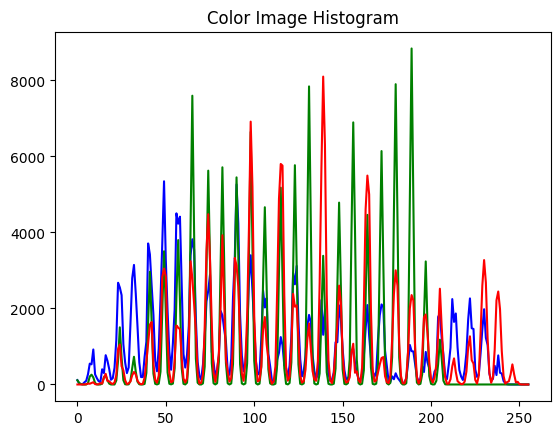

In [87]:
fp = "../../images/mandril_color.tif"
img = cv2.imread(fp)
colors = ('b','g','r')
for i,color in enumerate(colors):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('Color Image Histogram')
plt.show()